In [1]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !sudo apt update
# !sudo apt install tesseract-ocr
# !sudo apt install libtesseract-dev

In [3]:
import pytesseract
import cv2
import pandas
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/pytesseract'

In [4]:
image  = cv2.imread('/content/invoice_1.png')
base_image = image.copy()

In [5]:
gray =  cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [6]:
cv2.imwrite('/content/invoice_1_gray.png',gray)

True

In [7]:
blur = cv2.GaussianBlur(gray,(7,7),0)

In [8]:
cv2.imwrite('/content/invoice_1_blur.png',blur)

True

In [9]:
thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)[1]

In [10]:
cv2.imwrite('/content/invoice_1_thresh.png',thresh)

True

In [11]:
kernal = cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))

In [12]:
cv2.imwrite('/content/invoice_1_kernal.png',kernal)

True

In [13]:
dilate = cv2.dilate(thresh,kernal, iterations = 1)

In [14]:
cv2.imwrite('/content/invoice_1_dilate.png',dilate)

True

In [15]:
cnts = cv2.findContours(dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [16]:
cnts  = cnts[0] if len(cnts)==2 else cnts[1]

In [17]:
cnts = sorted(cnts, key = lambda x:cv2.boundingRect(x)[0])

In [18]:
# for c in cnts:
#   x,y,w,h = cv2.boundingRect(c)
#   cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12),2)

In [19]:
#cv2.imwrite('/content/invoice_1_bbox.png',image)

In [20]:
results = []
for c in cnts:
  x,y,w,h = cv2.boundingRect(c)
  if h>200 and w>5:
    roi = image[x:x+h,y:y+h]
    cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12),2)
    ocr_result = pytesseract.image_to_string(roi)
    ocr_result = ocr_result.split("\n")
    for item in ocr_result:
      results.append(item)
      
cv2.imwrite('/content/invoice_1_bbox.png',image)

True

In [21]:
results

[]

In [22]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 18.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[50, 68], [200, 68], [200, 96], [50, 96]], 'Saffron Design', 0.940611575609147), ([[607, 67], [697, 67], [697, 91], [607, 91]], 'INVOICE', 0.9998186858222987), ([[53, 113], [151, 113], [151, 129], [53, 129]], '77 Namrata Bldg', 0.7794079846927127), ([[53, 131], [167, 131], [167, 147], [53, 147]], 'Delhi, Delhi 400077', 0.7672751382257923), ([[53, 241], [95, 241], [95, 257], [53, 257]], 'Bill To', 0.9977173006997739), ([[281, 241], [331, 241], [331, 257], [281, 257]], 'Ship To', 0.9988547670199072), ([[537, 243], [595, 243], [595, 257], [537, 257]], 'Invoice #', 0.8853170550475858), ([[657, 241], [697, 241], [697, 257], [657, 257]], 'In-001', 0.4262224154761857), ([[53, 263], [157, 263], [157, 279], [53, 279]], 'Kavindra Mannan', 0.776534607072998), ([[280, 262], [383, 262], [383, 279], [280, 279]], 'Kavindra Mannan', 0.9088150834609612), ([[515, 267], [595, 267], [595, 283], [515, 283]], 'Invoice Date', 0.

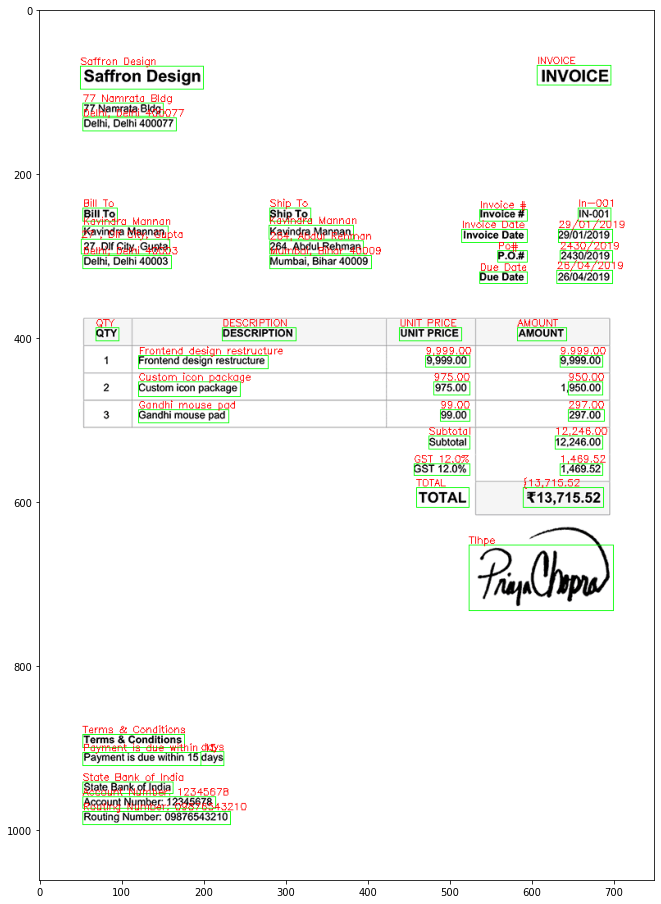

In [23]:
import easyocr
import cv2
import matplotlib.pyplot as plt
reader = easyocr.Reader(['en'], gpu=False)
image = cv2.imread('/content/invoice_1_bbox.png')
result = reader.readtext('/content/invoice_1_bbox.png')
print(result)
Total = []
for (bbox, text, prob) in result:
    Total.append(text)
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    cv2.rectangle(image, tl, br, (0, 255, 0), 1)
    cv2.putText(image, text, (tl[0], tl[1] - 2),cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0),1)
plt.rcParams['figure.figsize'] = (16,16)
plt.imshow(image)
plt.show()
#print(' '.join(Total).split("SHIP TO", 1)[1])

In [24]:
result

[([[50, 68], [200, 68], [200, 96], [50, 96]],
  'Saffron Design',
  0.940611575609147),
 ([[607, 67], [697, 67], [697, 91], [607, 91]], 'INVOICE', 0.9998186858222987),
 ([[53, 113], [151, 113], [151, 129], [53, 129]],
  '77 Namrata Bldg',
  0.7794079846927127),
 ([[53, 131], [167, 131], [167, 147], [53, 147]],
  'Delhi, Delhi 400077',
  0.7672751382257923),
 ([[53, 241], [95, 241], [95, 257], [53, 257]], 'Bill To', 0.9977173006997739),
 ([[281, 241], [331, 241], [331, 257], [281, 257]],
  'Ship To',
  0.9988547670199072),
 ([[537, 243], [595, 243], [595, 257], [537, 257]],
  'Invoice #',
  0.8853170550475858),
 ([[657, 241], [697, 241], [697, 257], [657, 257]],
  'In-001',
  0.4262224154761857),
 ([[53, 263], [157, 263], [157, 279], [53, 279]],
  'Kavindra Mannan',
  0.776534607072998),
 ([[280, 262], [383, 262], [383, 279], [280, 279]],
  'Kavindra Mannan',
  0.9088150834609612),
 ([[515, 267], [595, 267], [595, 283], [515, 283]],
  'Invoice Date',
  0.8836114143785145),
 ([[633, 267]